In [ ]:
import torch
import numpy as np
import pandas as pd
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.shape

(1025, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df['target'].nunique()

2

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
sc_x = StandardScaler()
X_train_scaled = sc_x.fit_transform(X_train)
X_test_scaled = sc_x.transform(X_test)

In [1]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

NameError: name 'torch' is not defined

In [ ]:
class HeartDiseaseClassifier(nn.Module):
    def __init__(self, input_size):
        super(HeartDiseaseClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

In [ ]:
torch.manual_seed(42)

In [ ]:
model = HeartDiseaseClassifier(X_train_tensor.shape[1])

loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
loss_history = []

for epoch in range(1000):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = loss_function(outputs.squeeze(), y_train_tensor)
    loss_history.append(loss.item())
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 0.000721258285921067
Epoch 100, Loss: 0.0005629654624499381
Epoch 200, Loss: 0.00045020063407719135
Epoch 300, Loss: 0.00036801875103265047
Epoch 400, Loss: 0.00030452682403847575
Epoch 500, Loss: 0.00025584333343431354
Epoch 600, Loss: 0.0002173599787056446
Epoch 700, Loss: 0.00018644191732164472
Epoch 800, Loss: 0.00016119836072903126
Epoch 900, Loss: 0.00014052899496164173


In [ ]:
model.eval()

HeartDiseaseClassifier(
  (fc1): Linear(in_features=13, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

In [ ]:
with torch.no_grad():
    outputs = model(X_test_tensor)
    predictions = (outputs > 0.5).float()
    accuracy = accuracy_score(y_test_tensor, predictions)
    print(f'Test Accuracy: {accuracy}')
    cm = confusion_matrix(y_test_tensor, predictions)
    print('Confusion Matrix:')
    print(cm)
    tn, fp, fn, tp = cm.ravel()
    print('True Negatives:', tn)
    print('False Positives:', fp)
    print('False Negatives:', fn)
    print('True Positives:', tp)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    print('Sensitivity:', sensitivity)
    print('Specificity:', specificity)
    precision = tp / (tp + fp)
    print('Precision:', precision)
    recall = tp / (tp + fn)
    print('Recall:', recall)
    f1_score = 2 * (precision * recall) / (precision + recall)
    print('F1 Score:', f1_score)

Test Accuracy: 0.9853658536585366
Confusion Matrix:
[[102   0]
 [  3 100]]
True Negatives: 102
False Positives: 0
False Negatives: 3
True Positives: 100
Sensitivity: 0.970873786407767
Specificity: 1.0
Precision: 1.0
Recall: 0.970873786407767
F1 Score: 0.9852216748768473


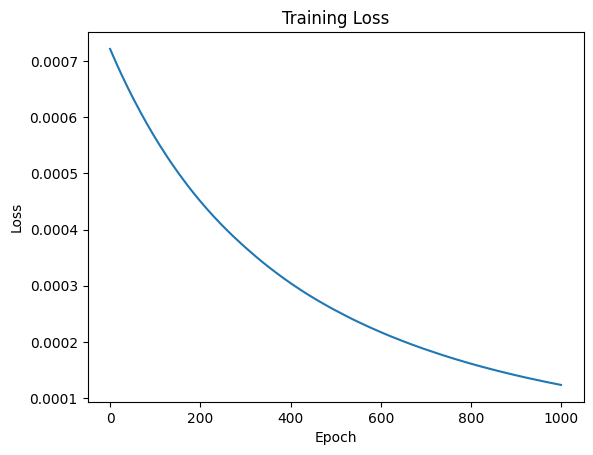

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()